# Information Value

Vamos a testear Information Value definido por Zanette & Montemurro.

La primer versión que veremos es sobre un texto shuffleado. Esta es la que, en teoría, anda bien (o al menos da los mismos resultados que el paper!).

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

sys.path.append("..")

from __future__ import division, print_function
import pandas as pd
import numpy as np
import nltk
import math
from nltk.corpus import stopwords, gutenberg 
from iv_helpers import get_moby_dick_tokens

md_tokens = get_moby_dick_tokens()

fd = nltk.FreqDist(md_tokens)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from scipy.stats import entropy

window_size = 5000

def ocurrence_dataframe(tokenized_text, window_size):
    """
    Construye una matriz de ocurrencias dado un tamaño de ventana
    """
    freq = {}
    """
    N = Largo del texto
    P = Cantidad de ventanas
    """
    N = len(tokenized_text)
    P = int(math.ceil(N / window_size))

    for i in range(0, P):
        """
        Para cada ventana: hago un Fdist de la ventana, y lo sumo a las palabras que ya tenga
        """
        lower_bound, upper_bound = window_size * i, min(window_size* (i+1), N) 
        window = tokenized_text[lower_bound:upper_bound]
        window_fdist = nltk.FreqDist(window)

        for word in window_fdist:
            if word not in freq:
                freq[word] = [0] * P
                
            freq[word][i] = window_fdist[word]
            
    df = pd.DataFrame.from_dict(freq, orient="index")
    
    df["entropy"] = df.apply(entropy, axis=1, raw=True)
    df["total"] = df[range(P)].apply(sum, axis=1, raw=True)
    df["freq"] = df["total"] / len(tokenized_text)
    df["not_stop_word"] = df.index.map(lambda w: w not in stopwords.words('english'))
    
    return df

occurrence_df = ocurrence_dataframe(md_tokens, window_size)

occurrence_df.sort_values(by="entropy", inplace=True)

In [13]:
occurrence_df.iloc[:100]

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,entropy,total,freq,not_stop_word
whiteness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.479166,27,0.000129,True
blacksmith,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.486913,21,0.000100,True
steelkilt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.661563,40,0.000191,True
lakeman,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.661563,24,0.000115,True
radney,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.689009,22,0.000105,True
landlord,0,19,11,0,2,1,0,0,0,0,...,0,0,0,0,0,0,1.064376,34,0.000162,True
bildad,0,0,0,0,0,3,38,25,10,0,...,0,0,0,0,0,0,1.106762,76,0.000363,True
peleg,0,0,0,0,0,8,31,26,8,0,...,0,0,0,0,0,0,1.271157,74,0.000353,True
cook,4,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,1.287807,55,0.000263,True
gentlemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.337295,38,0.000181,True


# Problema con Entropía

Observemos que, si utilizamos la entropía como medida, me quedan ordenadas primero las palabras con baja frecuencia: más aún, las que aparecen una vez están primeras que todos porque tienen entropía mínima.

# Information Value

Calculemos Information Value con un texto randomizado

In [14]:
import random

# Shuffleo Texto
shuffled_text = random.shuffle(md_tokens)
shuffled_df = ocurrence_dataframe(md_tokens, window_size)
#
occurrence_df["shuffled_entropy"] = shuffled_df["entropy"]
occurrence_df["information_value"] = occurrence_df.freq * (occurrence_df.shuffled_entropy - occurrence_df.entropy)

occurrence_df.sort_values("information_value", ascending=False, inplace=True)
occurrence_df.iloc[:40]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,entropy,total,freq,not_stop_word,shuffled_entropy,information_value
whale,76,9,1,9,5,9,2,7,26,8,...,10,25,30,32,3.437954,1226,0.005854,True,3.723684,0.001673
ahab,0,0,0,0,0,4,15,14,1,31,...,32,41,40,34,3.129364,511,0.002440,True,3.697917,0.001387
queequeg,0,0,22,1,33,32,28,38,3,2,...,3,1,0,2,2.680595,252,0.001203,True,3.643516,0.001159
is,63,34,20,66,36,18,14,19,40,23,...,13,23,30,16,3.592272,1725,0.008237,False,3.729819,0.001133
ye,5,4,6,6,3,21,17,40,25,11,...,16,11,21,19,3.230246,472,0.002254,True,3.696775,0.001051
you,32,46,22,6,19,23,18,35,10,17,...,13,3,0,2,3.480810,894,0.004269,False,3.716226,0.001005
thou,2,3,0,6,0,18,13,12,9,2,...,19,3,7,16,2.934329,271,0.001294,True,3.644473,0.000919
me,16,35,49,12,40,20,39,21,9,30,...,29,13,15,28,3.403535,633,0.003022,False,3.701923,0.000902
bildad,0,0,0,0,0,3,38,25,10,0,...,0,0,0,0,1.106762,76,0.000363,True,3.425461,0.000841
stubb,0,0,0,0,0,0,0,1,9,23,...,8,2,17,10,2.959690,257,0.001227,True,3.637510,0.000832


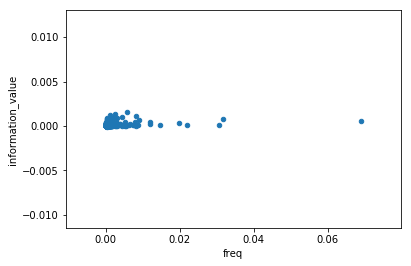

In [5]:
occurrence_df.plot.scatter(x="freq", y="information_value")